In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',None)

## We have three datasets 

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chethancheths/Car-Price-Prediction/main/Car%20details%20v3.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/chethancheths/Car-Price-Prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/chethancheths/Car-Price-Prediction/main/car%20data.csv')

In [ ]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Dropping unwanted features

In [ ]:
df1 = df1.drop(['name','mileage',	'engine',	'max_power',	'torque',	'seats'],axis=1)
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [ ]:
df1.shape

(8128, 7)

In [ ]:
df2 = df2.drop(['name'],axis=1)
print(df2.shape)
df2.head()

(4340, 7)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## In the 3rd dataset we gotta match the labels and change the numerical feature representation to match the other two datasets

In [ ]:
print(df3.shape)
df3.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df3.drop(['Car_Name','Present_Price'],axis=1,inplace=True)
df3.set_axis(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'], axis=1,inplace=True)

In [ ]:
print(df3.shape)
df3.head()

(301, 7)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,3.35,27000,Petrol,Dealer,Manual,0
1,2013,4.75,43000,Diesel,Dealer,Manual,0
2,2017,7.25,6900,Petrol,Dealer,Manual,0
3,2011,2.85,5200,Petrol,Dealer,Manual,0
4,2014,4.60,42450,Diesel,Dealer,Manual,0


In [ ]:
### Convert Selling price to lakhs

df3.selling_price = df3.selling_price.apply(lambda x: int(x*100000))
df3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,335000,27000,Petrol,Dealer,Manual,0
1,2013,475000,43000,Diesel,Dealer,Manual,0
2,2017,725000,6900,Petrol,Dealer,Manual,0
3,2011,285000,5200,Petrol,Dealer,Manual,0
4,2014,459999,42450,Diesel,Dealer,Manual,0


In [ ]:
df3.owner.value_counts()

0    290
1     10
3      1
Name: owner, dtype: int64

In [ ]:
def convert_to_categorical(x):
    if x==0:
        x='First Owner'
    elif x==1:
        x='Second Owner'
    else:
        x='Third Owner'
    return x

In [ ]:
df3['owner'] = df3['owner'].apply(lambda x : str(convert_to_categorical(x)))
df3.owner.value_counts()

First Owner     290
Second Owner     10
Third Owner       1
Name: owner, dtype: int64

In [ ]:
df3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,335000,27000,Petrol,Dealer,Manual,First Owner
1,2013,475000,43000,Diesel,Dealer,Manual,First Owner
2,2017,725000,6900,Petrol,Dealer,Manual,First Owner
3,2011,285000,5200,Petrol,Dealer,Manual,First Owner
4,2014,459999,42450,Diesel,Dealer,Manual,First Owner


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           301 non-null    int64 
 1   selling_price  301 non-null    int64 
 2   km_driven      301 non-null    int64 
 3   fuel           301 non-null    object
 4   seller_type    301 non-null    object
 5   transmission   301 non-null    object
 6   owner          301 non-null    object
dtypes: int64(3), object(4)
memory usage: 16.6+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           8128 non-null   int64 
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   object
 4   seller_type    8128 non-null   object
 5   transmission   8128 non-null   object
 6   owner          8128 non-null   object
dtypes: int64(3), object(4)
memory usage: 444.6+ KB


## Concating three datasets

In [ ]:
data_frames = [df1,df2,df3]
df = pd.concat(data_frames)

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [ ]:
df.shape

(12769, 7)

#  Data Analysis 
Understanding more about the data to find out below stuffs

1. Missing Values
2. All the Numerical Variables
3. Distribution of Numerical Variables
4. Catergorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship b/w independent and dependent feature(SalePrice)

In [ ]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
numerical_features = [ features for features in df.columns if df[features].dtype != 'O']
numerical_features

['year', 'selling_price', 'km_driven']

**year** is a temporal variable and 

**selling_price** is our Independent Variable

#### Analysing the temporal datetime variable

In [ ]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991, 1992])

Text(0.5, 1.0, 'Year vs selling Price ')

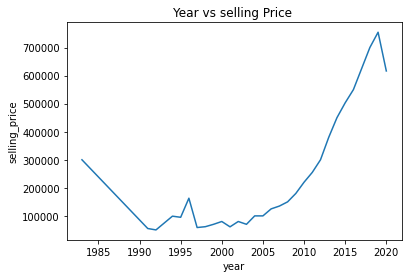

In [ ]:
df.groupby('year')['selling_price'].median().plot()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('Year vs selling Price ')

The selling price seems to be increasing with the year 

i.e newer the car greater the selling price

## Convert this year feature into number of year from current year

In [ ]:
df['number_of_years'] = 2022 - df['year']
len(df['number_of_years'])

12769

In [ ]:
df['number_of_years']

0       8
1       8
2      16
3      12
4      15
       ..
296     6
297     7
298    13
299     5
300     6
Name: number_of_years, Length: 12769, dtype: int64

In [ ]:
df.drop(['year'],axis=1,inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,number_of_years
0,450000,145500,Diesel,Individual,Manual,First Owner,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,16
3,225000,127000,Diesel,Individual,Manual,First Owner,12
4,130000,120000,Petrol,Individual,Manual,First Owner,15


## Relationship b/w kms driven with selling price

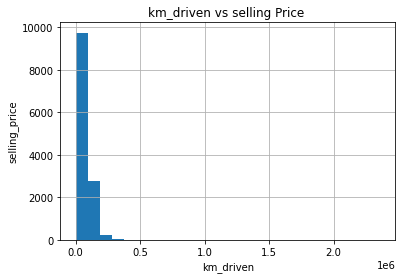

In [ ]:
df['km_driven'].hist(bins=25)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('km_driven vs selling Price ')
plt.show()

**The data is right skewed**

# Categorical Features

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['fuel', 'seller_type', 'transmission', 'owner']

In [ ]:
for feature in categorical_features:
    print(f'{feature} \n number of categories  -  {len(df[feature].unique())}')

fuel 
 number of categories  -  5
seller_type 
 number of categories  -  3
transmission 
 number of categories  -  2
owner 
 number of categories  -  5


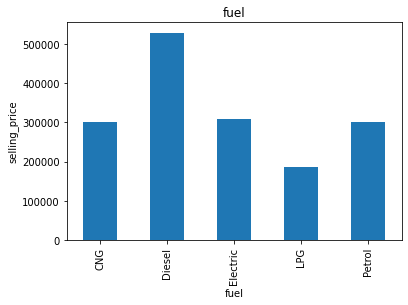

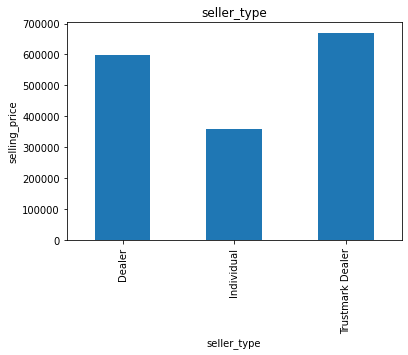

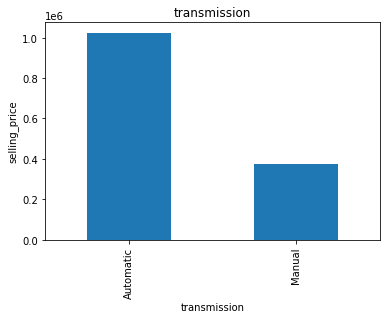

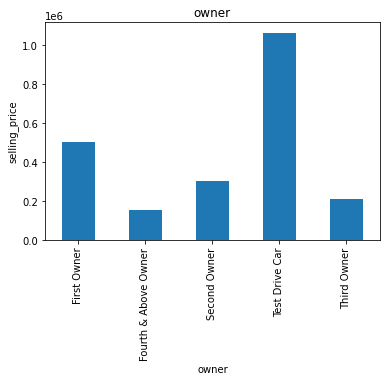

In [ ]:
for feature in categorical_features:
  data = df.copy()
  data.groupby(feature)['selling_price'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('selling_price')
  plt.title(feature)
  plt.show()
  print('\n')


## Feature engineerning

In [ ]:
df.isna().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
number_of_years    0
dtype: int64

## Handling Categorical features

In [ ]:
df['owner'].value_counts()

First Owner             8411
Second Owner            3221
Third Owner              860
Fourth & Above Owner     255
Test Drive Car            22
Name: owner, dtype: int64

#### dropping all test drive cars

In [ ]:
df = df[df['owner']!='Test Drive Car']
df['owner'].value_counts()

First Owner             8411
Second Owner            3221
Third Owner              860
Fourth & Above Owner     255
Name: owner, dtype: int64

In [ ]:
def handling_owner_feature(x):
  if x=='First Owner':
    x=1
  elif x=='Second Owner':
    x=2
  elif x=='Third Owner':
    x=3
  else :
    x=4
  return x

In [ ]:
df['owner'] = df['owner'].apply(lambda x: handling_owner_feature(x))
df['owner'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    8411
2    3221
3     860
4     255
Name: owner, dtype: int64

In [ ]:
df['owner'].astype(int)

0      1
1      2
2      3
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: owner, Length: 12747, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12747 entries, 0 to 300
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   selling_price    12747 non-null  int64 
 1   km_driven        12747 non-null  int64 
 2   fuel             12747 non-null  object
 3   seller_type      12747 non-null  object
 4   transmission     12747 non-null  object
 5   owner            12747 non-null  int64 
 6   number_of_years  12747 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 796.7+ KB


## Encoding Categorical features

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,selling_price,km_driven,owner,number_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,450000,145500,1,8,1,0,0,0,1,0,1
1,370000,120000,2,8,1,0,0,0,1,0,1
2,158000,140000,3,16,0,0,0,1,1,0,1
3,225000,127000,1,12,1,0,0,0,1,0,1
4,130000,120000,1,15,0,0,0,1,1,0,1


In [ ]:
df.shape

(12747, 11)

In [ ]:
import seaborn as sns

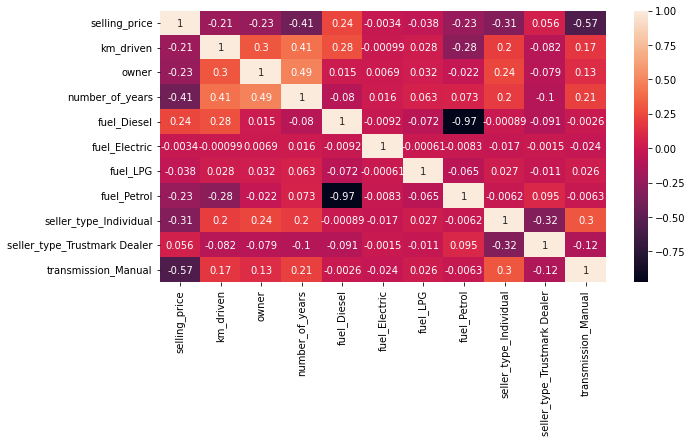

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

## Fuel petrol and fuel diesel are highly correlated we can drop any one of them

##Feature Scaling

In [ ]:
df.head()

,selling_price,km_driven,owner,number_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,450000,145500,1,8,1,0,0,0,1,0,1
1,370000,120000,2,8,1,0,0,0,1,0,1
2,158000,140000,3,16,0,0,0,1,1,0,1
3,225000,127000,1,12,1,0,0,0,1,0,1
4,130000,120000,1,15,0,0,0,1,1,0,1


In [ ]:
numerical_features

['year', 'selling_price', 'km_driven']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df['selling_price'] = sc.fit_transform(df[['selling_price']])
df['km_driven'] = sc.fit_transform(df[['km_driven']])
df['owner'] = sc.fit_transform(df[['owner']])
df['number_of_years'] = sc.fit_transform(df[['number_of_years']])
  			


In [ ]:
df.head()

,selling_price,km_driven,owner,number_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.044044,0.061640,0.000000,0.162162,1,0,0,0,1,0,1
1,0.036036,0.050837,0.333333,0.162162,1,0,0,0,1,0,1
2,0.014815,0.059310,0.666667,0.378378,0,0,0,1,1,0,1
3,0.021522,0.053803,0.000000,0.270270,1,0,0,0,1,0,1
4,0.012012,0.050837,0.000000,0.351351,0,0,0,1,1,0,1


# Model Training

In [ ]:
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [ ]:
X.head()

,km_driven,owner,number_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.061640,0.000000,0.162162,1,0,0,0,1,0,1
1,0.050837,0.333333,0.162162,1,0,0,0,1,0,1
2,0.059310,0.666667,0.378378,0,0,0,1,1,0,1
3,0.053803,0.000000,0.270270,1,0,0,0,1,0,1
4,0.050837,0.000000,0.351351,0,0,0,1,1,0,1


In [ ]:
y.head()

0    0.044044
1    0.036036
2    0.014815
3    0.021522
4    0.012012
Name: selling_price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape)
print(y_test.shape)

(8922, 10) (3825, 10)
(3825,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.4559410759737127

## Linead regresion gives very less accuracy

#### Trying other algorithms

## Decision Tree

In [ ]:
dec_reg = DecisionTreeRegressor(random_state=0)
dec_reg.fit(X_train, y_train)
dec_reg.score(X_test,y_test)

0.686556026867083

## Random forest regressor

In [ ]:
rand_reg = RandomForestRegressor(random_state=10)
rand_reg.fit(X_train, y_train)
rand_reg.score(X_test,y_test)

0.7585458941021437

## XG Boost Regressor

In [ ]:
xg_reg = GradientBoostingRegressor(random_state=0)
xg_reg.fit(X_train, y_train)
xg_reg.score(X_test,y_test)

0.727036421199703

## Cross validation on Random forest Regressor

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.78761229, 0.82935342, 0.73721785, 0.76339242, 0.74626492])

### Random Forest Regressor gives a decent scores
# hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [ ]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
model = RandomForestRegressor()
hyp = RandomizedSearchCV(estimator = model,
                        param_distributions=grid,
                        n_iter=10,
                       scoring= 'neg_mean_squared_error',
                        cv=5,verbose = 2,
                        random_state = 42,n_jobs = 1) 
hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
hyp.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=15,
                      n_estimators=300)

In [ ]:
rand_reg = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=15,
                      n_estimators=300,random_state=18)
rand_reg.fit(X_train, y_train)
rand_reg.score(X_test,y_test)

0.7726827210216441

In [ ]:
y_pred = rand_reg.predict(X_test)
sc.inverse_transform([y_pred])

array([[5.52684614, 4.70390605, 3.76629006, ..., 3.61189539, 3.25694941,
        4.44016701]])

In [ ]:
sc.inverse_transform([y_test])

array([[7.61111111, 4.37037037, 3.81481481, ..., 4.18518519, 6.        ,
        6.96296296]])

## Looks like the model has a decent accuracy of 77.27%